# Loan Approval Prediction Machine Learning

# Introduction

In this article we are going to solve the Loan Approval Prediction. This is a classificvation problem in whoch we need to classify whether the loan will be approved or not. 
classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. 

# Table of content

### Understanding the Problem Statement

1. About the dataset

2. Load essential python libraries

3. Load Trainning /Test datasets

4. Data Preprocessing

5. Exploratory Data Analysis(EDA)

6. Feature Engeneering

7. Build Machine Learning Model

8. Make predictions on the test dataset

9. Prepare submission file

10. conclusion

This project deals all kinds of home loans. They have a presence across all urban, semi0urban, and rural area. The customer first applies for a home loan and after that, the company validates the customer elegibility for the loan

The company wants to automate the loan eligibility process based on customer details provided while filling out online application forms, These details are Gender, Marital Status, Education, number of dependents, Income,Loan Amount,Credit History and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

The problem statement is given below and also download the dataset.


### Problem Statement:

Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



As mentioned above this is a Binary classification probelm in which we need to predict our target label which is "Loan_Status"

Loan status can have two values: Yes or No
    
Yes: if the loan is approved

No: if the loan is not approved
    
So using the dataset we will train our model and try to predict our target column that is "LoanStatus".


        

# About the Dataset:

Variable                Description
Loan_ID                 Unique_Id
Gender                  Male/Female
Married                 Applicant Married(Y/N)
Dependents              Number of Dependents
Education               Applicant Education(Graduate/Under Graduate)
Self_Employed           Self_Employed(Y/N)
ApplicantIncome         ApplicantIncome
CoapplicantIncome       Co ApplicantIncome
Loan_amount             LoanAmount in Thousands
Loan_Amount_Term        Term of Loan in Months
CreditHistory           Credit History meets the guidelines
Property_Area           Urban/Semi Urban/Rural
Loan_sTatus             (Target) Loan Approved(y/N)


# Import Essential  libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load the dataset

In [3]:

df=pd.read_csv("LoanPrediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

There are 614 rows and 13 columns in the dataset 

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Categorical Columns: Gender (Male/Female),Married (Yes/No),Number of Dependents (Possible values:0,1,2,3+), Education(Graduate/Under Graduate),Self-Employed(No/Yes), CreditHistory(Yes/No),PropertyArea(Rural/Urban/Semi-Urban) and Loan Status(Y/N)(i.e Target Variable)

Numerical Columns: LoanID,Applicant Income, Co=Applicant Income, Loan Amount, and Loan amount term
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


The dataset consist of 8 features are of object type, and 4 features are of float type and 1 is of type integer. Our target variable Loan_Status is of type object

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA

In [9]:
#Identifing missing values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset consist of null values in the columns Gender,Married,Dependents,self_Employed,LoanAmount,Loan_Amount_Term,Credit_History. so we have to fill those null values
For numerical_data we fill with mean/median
For categeorical_data we fill with mode of that perticular column

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

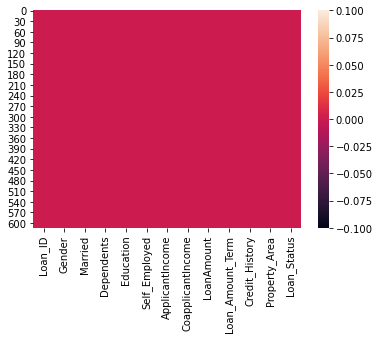

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Describe funtion shows statistical data of all the features.count tells the no.of rows in each column,and min,max values of the columns,mean and Standarddeviation of the columns values,and the quartiles information. there is a lagre gap between 75% and max columns for ApplicantIncome,coapplicantIncome,LoanAmount,may be some outliers present in the data.

# Data Visualization

# UnivariateAnalysis

## Independent Variable(categeorical)

Univariate Analysis is when we use each variable individually.For categeorical data we use barplot or frequency table which will calculate each categeory in a perticular variable.

In [15]:
#frequency table which gives the count of each variable in that column
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:

#percentage distribution can be calculated by setting normalize=True
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan_Status')

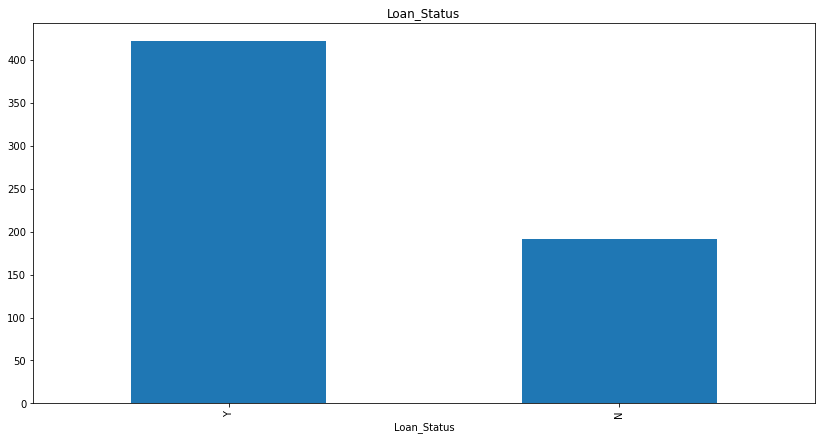

In [17]:
#barplot for Loan_Status
plt.figure(figsize=(14,7))
df['Loan_Status'].value_counts().plot.bar()
plt.xlabel("Loan_Status")
plt.title("Loan_Status")

422 members got yes(loan approval) and 19 members got No

<AxesSubplot:title={'center':'Education'}>

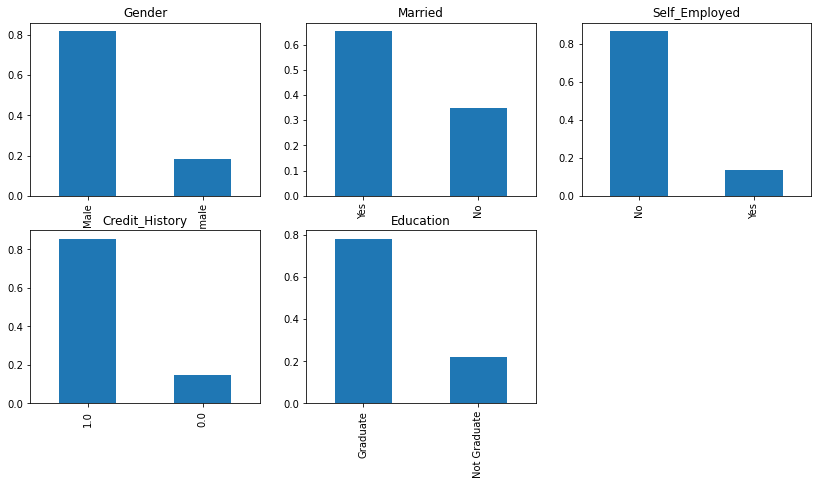

In [18]:
#visualising categeorical features
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(14,7),title='Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title='Education')


## Independent Variable(Ordinal)

variables in categeorical some variables are have some order(Dependents,Property_Area)

<AxesSubplot:title={'center':'Property_Area'}>

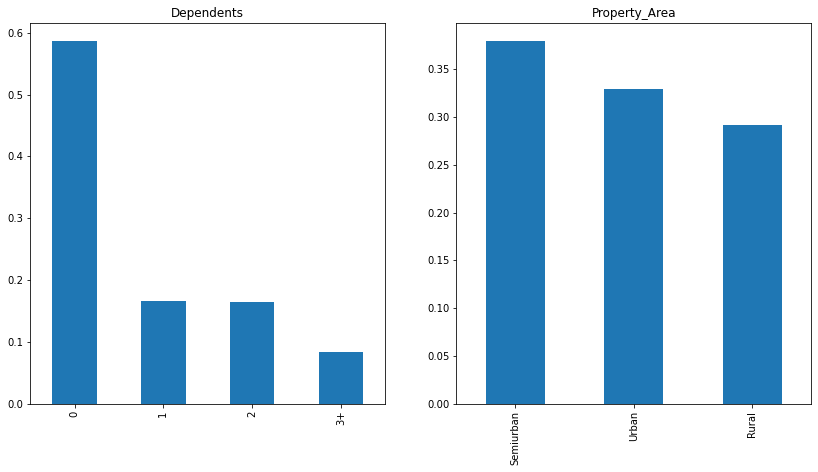

In [19]:
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(14,7),title='Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(14,7),title='Property_Area')


From the above graph we can observe that morethan half of the applicants are not having dependents,and most of the people are from semiurban area

# Independent variable(Numerical)

The features 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' are having numerical values

<AxesSubplot:>

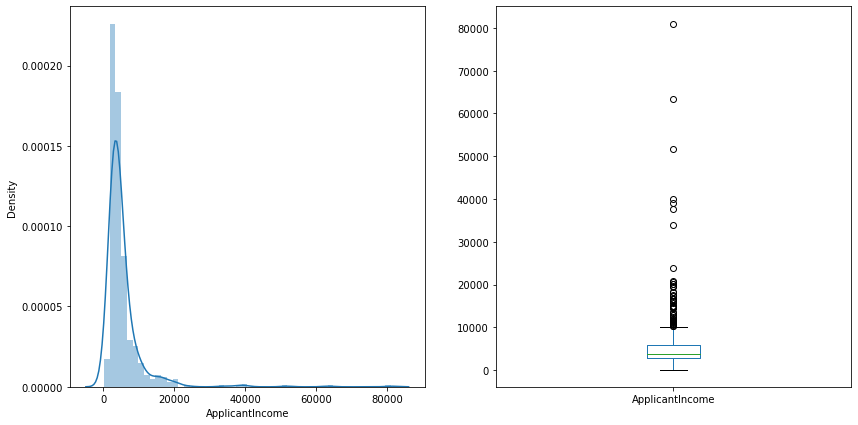

In [20]:
#visualizing ApplicantIncome
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(14,7))

From the above graphs ApplicantIncome is rightskewed and therre are so many outliers present in the data we have to handle them in later to perform the model better

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

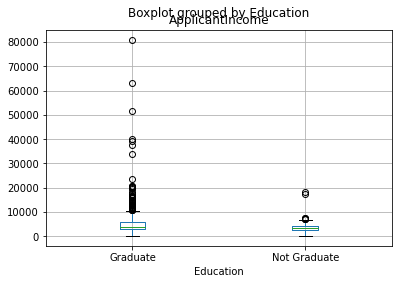

In [21]:
df.boxplot(column='ApplicantIncome',by='Education')

There is high income for Graduates may be that is present in the outliers

<AxesSubplot:title={'center':'CoapplicantIncome'}>

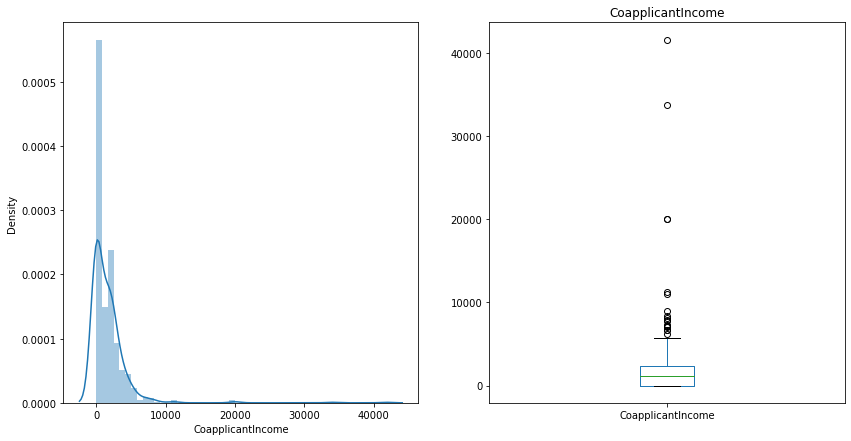

In [22]:

#visualizing 'CoapplicantIncome'
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(14,7),title='CoapplicantIncome')

CoapplicantIncome is not normally distributed and outliers also present in the data

<AxesSubplot:>

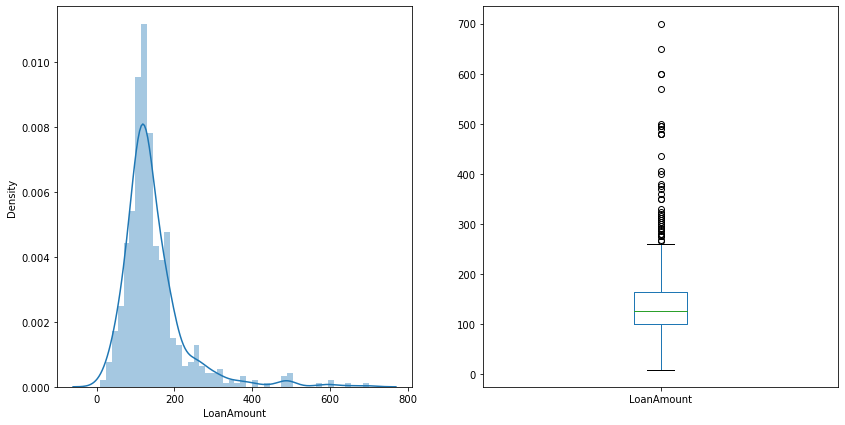

In [23]:

#visualize LoanAmount
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(14,7))

LoanAmount is normally distributed and slightly right skewed and there are outliers present in the data

<AxesSubplot:>

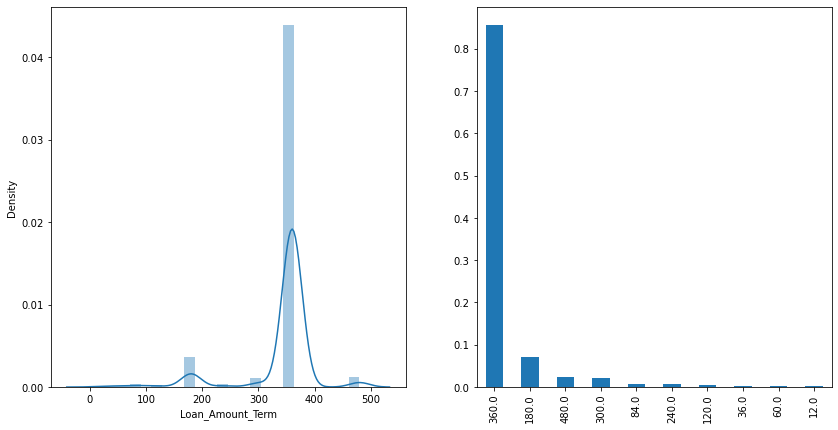

In [24]:
#Loan_Amount_Term
plt.subplot(121)
sns.distplot(df['Loan_Amount_Term'])

plt.subplot(122)
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(figsize=(14,7))




Most of the people are choosing the Loan_amount_Term as 360 months or 30 years of period and it is not normally skewed

# Bivariate Analysis

After exploring univariate Analysis we now analyze those features with target variable

## Categeorical Independent variables vs Target Variable

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


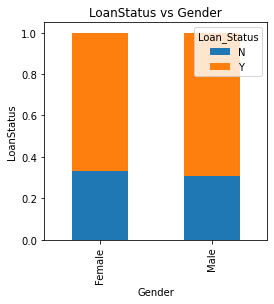

In [25]:
g=pd.crosstab(df['Gender'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Gender')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Gender')
print(g)

males LoanStatus is slightly highly accepted than female

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


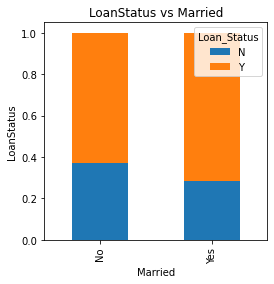

In [26]:
g=pd.crosstab(df['Married'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Married')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Married')
print(g)

Married Applicants are accepted more for loanapproval 

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


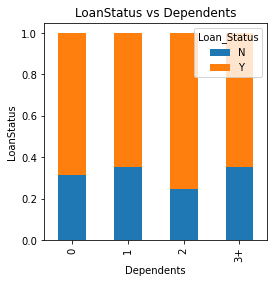

In [27]:
g=pd.crosstab(df['Dependents'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Dependents')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Dependents')
print(g)

dependents with 1 and 3+ having same loan approval rates

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


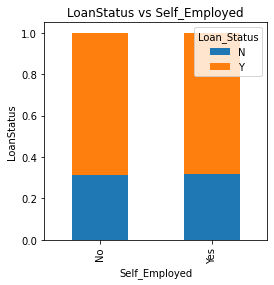

In [28]:
g=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Self_Employed')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Self_Employed')
print(g)

There is same loan approval ratio for self_Employed

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


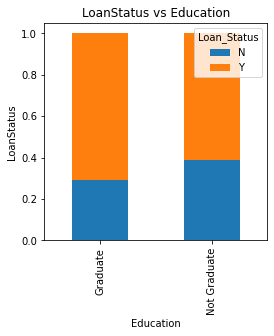

In [29]:
g=pd.crosstab(df['Education'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Education')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Education')
print(g)

Graduates got high loan approval than Not-Graduates

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


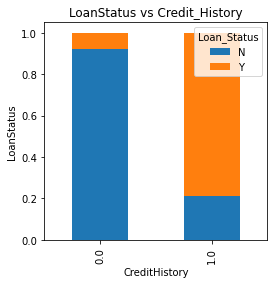

In [30]:
g=pd.crosstab(df['Credit_History'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('CreditHistory')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Credit_History')
print(g)

Credit_History with having 1 got approved for loan

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


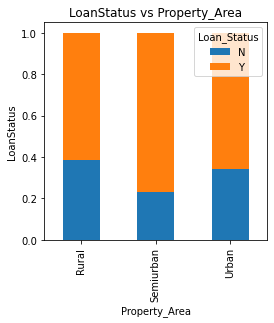

In [31]:


g=pd.crosstab(df['Property_Area'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Property_Area')
plt.ylabel('LoanStatus')
plt.title('LoanStatus vs Property_Area')
print(g)

people of semi urban got loan approved


### Visualize NumericalVaribles Bivariate Analysis

we will try to find mean income of the people who got loan approved and not approved 

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

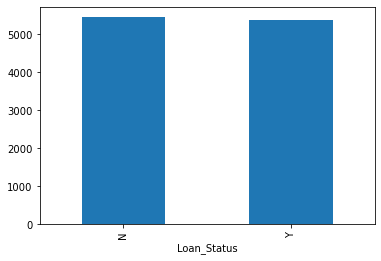

In [32]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is no significant difference between LoanApproval for Appliicants income,so ,we make bins for ApplicantIncome values and analyse LoanStatus

# Feature Engineering

In [33]:
#making bins for ApplicantIncome
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','VeryHigh']
df['Income_bins']=pd.cut(df['ApplicantIncome'],bins,labels=group)

In [34]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Loan_Status   N    Y
Income_bins         
Low          34   74
Average      67  159
High         45   98
VeryHigh     46   91


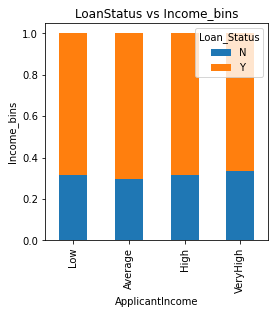

In [35]:
#visualize ApplicantIncome vs LoanStatus
g=pd.crosstab(df['Income_bins'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('ApplicantIncome')
plt.ylabel('Income_bins')
plt.title('LoanStatus vs Income_bins')
print(g)

ApplicantIncome does not affect the loan Approval 

In [36]:
#making bins for CoapplicantIncome
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df['CoapplicantIncome_bins']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Loan_Status              N    Y
CoapplicantIncome_bins         
Low                      3   19
Average                 61  161
High                    32   65


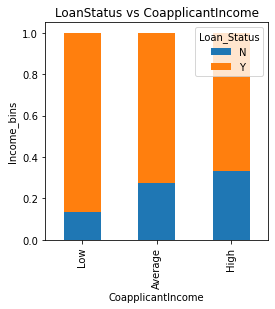

In [37]:
#visualize ApplicantIncome vs LoanStatus
g=pd.crosstab(df['CoapplicantIncome_bins'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Income_bins')
plt.title('LoanStatus vs CoapplicantIncome')
print(g)

As we can observe from the above graph that low CoApplicantIncome got approved loan than the Average and High.But this is not right.May be most ofthe applicants dont have coapplicants.

In [38]:
#making bins for LoanAmount
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmount_bins']=pd.cut(df['LoanAmount'],bins,labels=group)

Text(0, 0.5, 'Percentage')

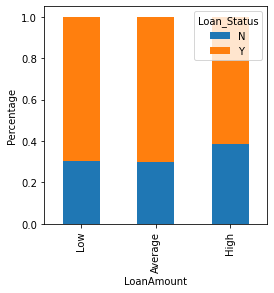

In [39]:
g=pd.crosstab(df['LoanAmount_bins'],df['Loan_Status'])
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

proportion of Approved loans is high for Low and Average LoanAmount than Higher LoanAmount,i.e chance of LoanApproval is high when the LoanAmount is less

In [40]:
#lets drop the bins columns created for analzing
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,CoapplicantIncome_bins,LoanAmount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,High,NaN,Average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,Average


In [41]:
df.drop(['Income_bins','CoapplicantIncome_bins','LoanAmount_bins'],axis=1,inplace=True)

# Correlation

In [42]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000


<AxesSubplot:>

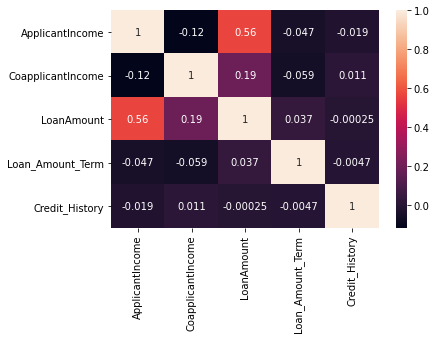

In [43]:
sns.heatmap(df.corr(),annot=True)


LoanAmount is correlaterd with ApplicantIncome with 56%
LoanAmount is correlaterd with CoapplicantIncome with 19%

# EncodingTechnique

Our data consist of categeorical data so, we need to convert into numerical by using LabelEncoder technique

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [45]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549


<AxesSubplot:>

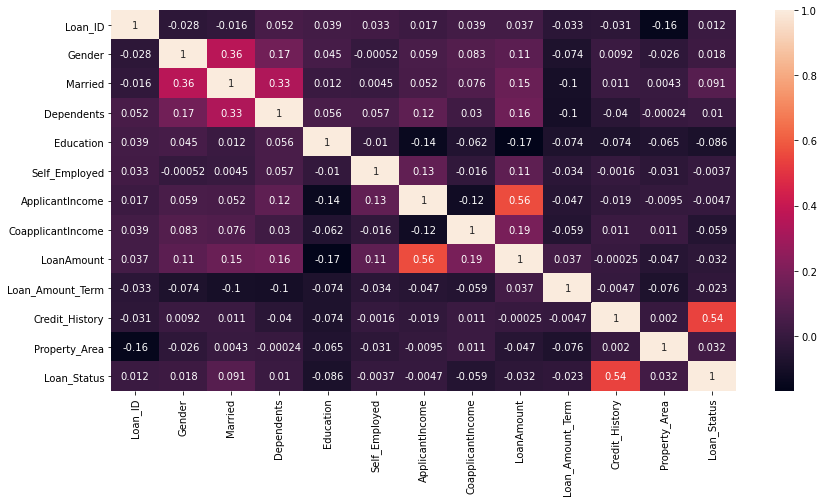

In [46]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)


# Skewness Checking

In [47]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Most of the features are not under the threshold value of skewness i.e+/-0.5

# Outliers Checking

Loan_ID                 AxesSubplot(0.125,0.125;0.0503247x0.755)
Gender                AxesSubplot(0.18539,0.125;0.0503247x0.755)
Married              AxesSubplot(0.245779,0.125;0.0503247x0.755)
Dependents           AxesSubplot(0.306169,0.125;0.0503247x0.755)
Education            AxesSubplot(0.366558,0.125;0.0503247x0.755)
Self_Employed        AxesSubplot(0.426948,0.125;0.0503247x0.755)
ApplicantIncome      AxesSubplot(0.487338,0.125;0.0503247x0.755)
CoapplicantIncome    AxesSubplot(0.547727,0.125;0.0503247x0.755)
LoanAmount           AxesSubplot(0.608117,0.125;0.0503247x0.755)
Loan_Amount_Term     AxesSubplot(0.668506,0.125;0.0503247x0.755)
Credit_History       AxesSubplot(0.728896,0.125;0.0503247x0.755)
Property_Area        AxesSubplot(0.789286,0.125;0.0503247x0.755)
Loan_Status          AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

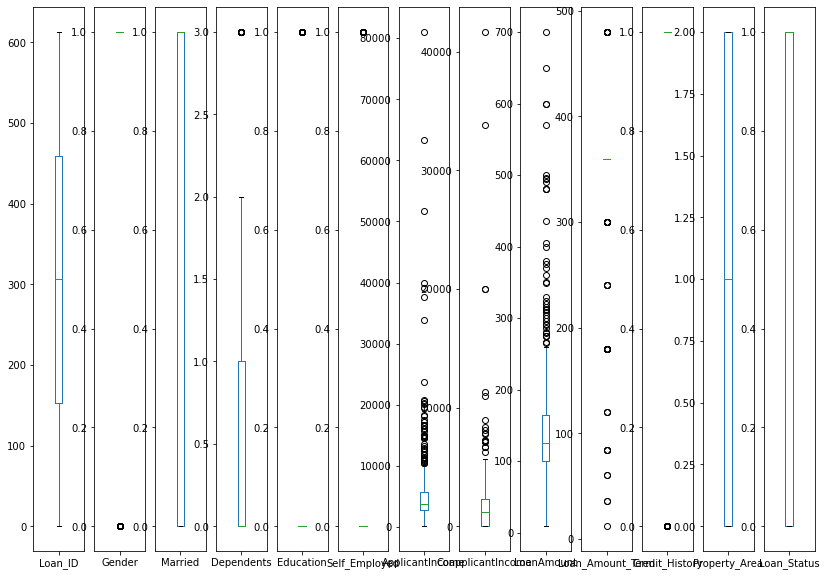

In [48]:
df.plot(kind='box',subplots=True,figsize=(14,10))

ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term having outliers,we have to handle it

# Removing Outliers

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [50]:
df.shape

(614, 13)

In [51]:
df_new.shape

(577, 13)

In [52]:
loss=((614-577)/614)*100
loss

6.026058631921824

There is a loss of 6% of data 

## seperating coumns into features and Target

In [53]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

## Transforming data to remove skewness we use powerTransformation method

In [54]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.13078824,
        -2.38941464,  0.01546372]])

## Scaling the data using StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [56]:
pd.DataFrame(x).skew()

0    -0.284298
1    -1.622920
2    -0.630211
3     0.478360
4     1.306588
5     2.252848
6     0.027981
7    -0.191876
8     0.047768
9     0.727533
10   -1.976043
11   -0.155094
dtype: float64

# Checking VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Features']=pd.DataFrame(x).columns
vif

,vif,Features
0,1.044137,0
1,1.219688,1
2,1.433205,2
3,1.189591,3
4,1.066730,4
5,1.056094,5
6,1.761500,6
7,1.584923,7
8,1.549506,8
9,1.048645,9


All the features are lessthan the cutoff value of vif i.e<5

# Model Building

since our target variable is bivariate so,we use the classification model

In [58]:
#seperating the independent variables and target variable

In [59]:
x=df_new.drop(['Loan_Status'],axis=1)
y=df_new['Loan_Status']

Using train_test_splt on the training data for validation

# Using ML algorithm for training

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

le=LogisticRegression()
for i in range(1,700):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    le.fit(x_train,y_train)
    pred_train=le.predict(x_train)
    pred_test=le.predict(x_test)
#if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print(f"At Random state {i} the training accuracy is:",accuracy_score(y_train,pred_train))
    print(f"At Random state {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
    print("\n")
    
    

At Random state 1 the training accuracy is: 0.8047722342733189
At Random state 1 the testing accuracy is: 0.8275862068965517


At Random state 2 the training accuracy is: 0.8177874186550976
At Random state 2 the testing accuracy is: 0.8103448275862069


At Random state 3 the training accuracy is: 0.824295010845987
At Random state 3 the testing accuracy is: 0.7844827586206896


At Random state 4 the training accuracy is: 0.8264642082429501
At Random state 4 the testing accuracy is: 0.7931034482758621


At Random state 5 the training accuracy is: 0.824295010845987
At Random state 5 the testing accuracy is: 0.7931034482758621


At Random state 6 the training accuracy is: 0.806941431670282
At Random state 6 the testing accuracy is: 0.8620689655172413


At Random state 7 the training accuracy is: 0.824295010845987
At Random state 7 the testing accuracy is: 0.8017241379310345


At Random state 8 the training accuracy is: 0.8286334056399133
At Random state 8 the testing accuracy is: 0.7758620

At Random state 66 the training accuracy is: 0.8156182212581344
At Random state 66 the testing accuracy is: 0.8103448275862069


At Random state 67 the training accuracy is: 0.8351409978308026
At Random state 67 the testing accuracy is: 0.75


At Random state 68 the training accuracy is: 0.8026030368763557
At Random state 68 the testing accuracy is: 0.8620689655172413


At Random state 69 the training accuracy is: 0.8091106290672451
At Random state 69 the testing accuracy is: 0.8189655172413793


At Random state 70 the training accuracy is: 0.8373101952277657
At Random state 70 the testing accuracy is: 0.7327586206896551


At Random state 71 the training accuracy is: 0.8091106290672451
At Random state 71 the testing accuracy is: 0.853448275862069


At Random state 72 the training accuracy is: 0.8221258134490239
At Random state 72 the testing accuracy is: 0.8017241379310345


At Random state 73 the training accuracy is: 0.8264642082429501
At Random state 73 the testing accuracy is: 0.76

At Random state 130 the training accuracy is: 0.8026030368763557
At Random state 130 the testing accuracy is: 0.8448275862068966


At Random state 131 the training accuracy is: 0.8221258134490239
At Random state 131 the testing accuracy is: 0.8189655172413793


At Random state 132 the training accuracy is: 0.7960954446854663
At Random state 132 the testing accuracy is: 0.7844827586206896


At Random state 133 the training accuracy is: 0.8156182212581344
At Random state 133 the testing accuracy is: 0.8275862068965517


At Random state 134 the training accuracy is: 0.8177874186550976
At Random state 134 the testing accuracy is: 0.8103448275862069


At Random state 135 the training accuracy is: 0.8134490238611713
At Random state 135 the testing accuracy is: 0.8103448275862069


At Random state 136 the training accuracy is: 0.8221258134490239
At Random state 136 the testing accuracy is: 0.7844827586206896


At Random state 137 the training accuracy is: 0.806941431670282
At Random state 137

At Random state 193 the training accuracy is: 0.8177874186550976
At Random state 193 the testing accuracy is: 0.8189655172413793


At Random state 194 the training accuracy is: 0.8329718004338394
At Random state 194 the testing accuracy is: 0.7586206896551724


At Random state 195 the training accuracy is: 0.8264642082429501
At Random state 195 the testing accuracy is: 0.7844827586206896


At Random state 196 the training accuracy is: 0.8026030368763557
At Random state 196 the testing accuracy is: 0.7758620689655172


At Random state 197 the training accuracy is: 0.8177874186550976
At Random state 197 the testing accuracy is: 0.8189655172413793


At Random state 198 the training accuracy is: 0.8221258134490239
At Random state 198 the testing accuracy is: 0.7931034482758621


At Random state 199 the training accuracy is: 0.8286334056399133
At Random state 199 the testing accuracy is: 0.7758620689655172


At Random state 200 the training accuracy is: 0.8394793926247288
At Random state 20

At Random state 257 the training accuracy is: 0.8286334056399133
At Random state 257 the testing accuracy is: 0.7758620689655172


At Random state 258 the training accuracy is: 0.8047722342733189
At Random state 258 the testing accuracy is: 0.8275862068965517


At Random state 259 the training accuracy is: 0.8156182212581344
At Random state 259 the testing accuracy is: 0.8275862068965517


At Random state 260 the training accuracy is: 0.8134490238611713
At Random state 260 the testing accuracy is: 0.8189655172413793


At Random state 261 the training accuracy is: 0.8026030368763557
At Random state 261 the testing accuracy is: 0.8706896551724138


At Random state 262 the training accuracy is: 0.8221258134490239
At Random state 262 the testing accuracy is: 0.8017241379310345


At Random state 263 the training accuracy is: 0.8308026030368764
At Random state 263 the testing accuracy is: 0.7758620689655172


At Random state 264 the training accuracy is: 0.8199566160520607
At Random state 26

At Random state 321 the training accuracy is: 0.8177874186550976
At Random state 321 the testing accuracy is: 0.8103448275862069


At Random state 322 the training accuracy is: 0.8199566160520607
At Random state 322 the testing accuracy is: 0.8103448275862069


At Random state 323 the training accuracy is: 0.8199566160520607
At Random state 323 the testing accuracy is: 0.8103448275862069


At Random state 324 the training accuracy is: 0.8308026030368764
At Random state 324 the testing accuracy is: 0.7672413793103449


At Random state 325 the training accuracy is: 0.8134490238611713
At Random state 325 the testing accuracy is: 0.7758620689655172


At Random state 326 the training accuracy is: 0.8112798264642083
At Random state 326 the testing accuracy is: 0.8362068965517241


At Random state 327 the training accuracy is: 0.8112798264642083
At Random state 327 the testing accuracy is: 0.8275862068965517


At Random state 328 the training accuracy is: 0.8134490238611713
At Random state 32

At Random state 385 the training accuracy is: 0.8221258134490239
At Random state 385 the testing accuracy is: 0.8017241379310345


At Random state 386 the training accuracy is: 0.8177874186550976
At Random state 386 the testing accuracy is: 0.8103448275862069


At Random state 387 the training accuracy is: 0.8026030368763557
At Random state 387 the testing accuracy is: 0.8017241379310345


At Random state 388 the training accuracy is: 0.8134490238611713
At Random state 388 the testing accuracy is: 0.8017241379310345


At Random state 389 the training accuracy is: 0.7960954446854663
At Random state 389 the testing accuracy is: 0.8706896551724138


At Random state 390 the training accuracy is: 0.8308026030368764
At Random state 390 the testing accuracy is: 0.7672413793103449


At Random state 391 the training accuracy is: 0.8134490238611713
At Random state 391 the testing accuracy is: 0.8362068965517241


At Random state 392 the training accuracy is: 0.806941431670282
At Random state 392

At Random state 449 the training accuracy is: 0.8177874186550976
At Random state 449 the testing accuracy is: 0.8275862068965517


At Random state 450 the training accuracy is: 0.8286334056399133
At Random state 450 the testing accuracy is: 0.7758620689655172


At Random state 451 the training accuracy is: 0.8264642082429501
At Random state 451 the testing accuracy is: 0.7758620689655172


At Random state 452 the training accuracy is: 0.8199566160520607
At Random state 452 the testing accuracy is: 0.8103448275862069


At Random state 453 the training accuracy is: 0.8134490238611713
At Random state 453 the testing accuracy is: 0.8103448275862069


At Random state 454 the training accuracy is: 0.8264642082429501
At Random state 454 the testing accuracy is: 0.7931034482758621


At Random state 455 the training accuracy is: 0.8177874186550976
At Random state 455 the testing accuracy is: 0.7931034482758621


At Random state 456 the training accuracy is: 0.8199566160520607
At Random state 45

At Random state 513 the training accuracy is: 0.8004338394793926
At Random state 513 the testing accuracy is: 0.8793103448275862


At Random state 514 the training accuracy is: 0.8177874186550976
At Random state 514 the testing accuracy is: 0.8017241379310345


At Random state 515 the training accuracy is: 0.7874186550976139
At Random state 515 the testing accuracy is: 0.8189655172413793


At Random state 516 the training accuracy is: 0.8286334056399133
At Random state 516 the testing accuracy is: 0.7413793103448276


At Random state 517 the training accuracy is: 0.8156182212581344
At Random state 517 the testing accuracy is: 0.8275862068965517


At Random state 518 the training accuracy is: 0.8112798264642083
At Random state 518 the testing accuracy is: 0.8362068965517241


At Random state 519 the training accuracy is: 0.8264642082429501
At Random state 519 the testing accuracy is: 0.8017241379310345


At Random state 520 the training accuracy is: 0.8199566160520607
At Random state 52

At Random state 578 the training accuracy is: 0.8112798264642083
At Random state 578 the testing accuracy is: 0.8103448275862069


At Random state 579 the training accuracy is: 0.7722342733188721
At Random state 579 the testing accuracy is: 0.8103448275862069


At Random state 580 the training accuracy is: 0.8199566160520607
At Random state 580 the testing accuracy is: 0.8103448275862069


At Random state 581 the training accuracy is: 0.8026030368763557
At Random state 581 the testing accuracy is: 0.8448275862068966


At Random state 582 the training accuracy is: 0.8091106290672451
At Random state 582 the testing accuracy is: 0.8448275862068966


At Random state 583 the training accuracy is: 0.8286334056399133
At Random state 583 the testing accuracy is: 0.7327586206896551


At Random state 584 the training accuracy is: 0.8177874186550976
At Random state 584 the testing accuracy is: 0.7672413793103449


At Random state 585 the training accuracy is: 0.8091106290672451
At Random state 58

At Random state 643 the training accuracy is: 0.8134490238611713
At Random state 643 the testing accuracy is: 0.8275862068965517


At Random state 644 the training accuracy is: 0.8199566160520607
At Random state 644 the testing accuracy is: 0.8103448275862069


At Random state 645 the training accuracy is: 0.8221258134490239
At Random state 645 the testing accuracy is: 0.7844827586206896


At Random state 646 the training accuracy is: 0.8177874186550976
At Random state 646 the testing accuracy is: 0.8189655172413793


At Random state 647 the training accuracy is: 0.8199566160520607
At Random state 647 the testing accuracy is: 0.8103448275862069


At Random state 648 the training accuracy is: 0.8199566160520607
At Random state 648 the testing accuracy is: 0.7844827586206896


At Random state 649 the training accuracy is: 0.8177874186550976
At Random state 649 the testing accuracy is: 0.7758620689655172


At Random state 650 the training accuracy is: 0.8286334056399133
At Random state 65

we have a (80:20) split on the training data 

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=699)

from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75        36
           1       0.86      0.97      0.91        80

    accuracy                           0.87       116
   macro avg       0.89      0.81      0.83       116
weighted avg       0.88      0.87      0.86       116



we have used multiple algorithms for training purposes like Decision Tree, Random Forest, SVC, Logistic Regression,KNN,Gradient Boosting Classifier etc

# DecisionTreeClassifier

In [62]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())


Accuracy_score 0.8017241379310345
[[28  8]
 [15 65]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        36
           1       0.89      0.81      0.85        80

    accuracy                           0.80       116
   macro avg       0.77      0.80      0.78       116
weighted avg       0.82      0.80      0.81       116

cross_validation_score is: 0.6451724137931034


# KNN

In [63]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_validation_score is:",cross_val_score(knn,x,y,cv=5).mean())


Accuracy_score 0.6120689655172413
[[ 4 32]
 [13 67]]
              precision    recall  f1-score   support

           0       0.24      0.11      0.15        36
           1       0.68      0.84      0.75        80

    accuracy                           0.61       116
   macro avg       0.46      0.47      0.45       116
weighted avg       0.54      0.61      0.56       116

cross_validation_score is: 0.606566716641679



# SVC

In [64]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_validation_score is:",cross_val_score(svc,x,y,cv=5).mean())


Accuracy_score 0.6896551724137931
[[ 0 36]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.69      1.00      0.82        80

    accuracy                           0.69       116
   macro avg       0.34      0.50      0.41       116
weighted avg       0.48      0.69      0.56       116

cross_validation_score is: 0.6897751124437781


In [65]:
from sklearn.svm import SVC
svc1=SVC(kernel='poly')
svc1.fit(x_train,y_train)
predsvc1=svc1.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predsvc1))
print(confusion_matrix(y_test,predsvc1))
print(classification_report(y_test,predsvc1))
print("cross_validation_score is:",cross_val_score(svc1,x,y,cv=5).mean())


Accuracy_score 0.6896551724137931
[[ 0 36]
 [ 0 80]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.69      1.00      0.82        80

    accuracy                           0.69       116
   macro avg       0.34      0.50      0.41       116
weighted avg       0.48      0.69      0.56       116

cross_validation_score is: 0.6897751124437781


# RandomForestClassifier

In [66]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_validation_score is:",cross_val_score(rfc,x,y,cv=5).mean())


Accuracy_score 0.8706896551724138
[[25 11]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77        36
           1       0.87      0.95      0.91        80

    accuracy                           0.87       116
   macro avg       0.87      0.82      0.84       116
weighted avg       0.87      0.87      0.87       116

cross_validation_score is: 0.7921589205397301


# GradientBoostingClassifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_validation_score is:",cross_val_score(gbc,x,y,cv=5).mean())


Accuracy_score 0.8793103448275862
[[24 12]
 [ 2 78]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        36
           1       0.87      0.97      0.92        80

    accuracy                           0.88       116
   macro avg       0.89      0.82      0.85       116
weighted avg       0.88      0.88      0.87       116

cross_validation_score is: 0.7473013493253374


Among all the algorithms I got Gradient Boosting Classifier is getting the Highest Accuracy score i.e 87.93% with cross validation score 74.73%

After getting high accuracy_score i tried fine-tuning it to improve my accuracyscore using GridSearchCV.

# HyperParameterTuning

In [68]:
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier()
param_grid={"criterion":['friedman_mse','squared_error','mse'],
           "n_estimators":[100,300],
           "learning_rate":[1.0,3.0,5.0],
           "max_depth":[3,10],
           "max_features":['auto','sqrt','log2']
           }

gb=GridSearchCV(gbc,param_grid=param_grid,cv=5)
gb.fit(x_train,y_train)
gbc_best=gb.best_params_

In [66]:
gbc_best

{'criterion': 'squared_error',
 'learning_rate': 1.0,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

The best parameters I got after Hyperparameter tuning were:{'criterion': 'squared_error',
 'learning_rate': 1.0,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [69]:
g=GradientBoostingClassifier(criterion='mse',learning_rate=1.0,max_depth=10,max_features='sqrt',n_estimators=300)
g.fit(x,y)
g.score(x_train,y_train)
pred_decision=g.predict(x_test)

gs=accuracy_score(y_test,pred_decision)
print('accuracy_score',gs*100)
gsscore=cross_val_score(g,x,y,cv=5)
gc=gsscore.mean()
print("cross_val_score:",gc*100)

accuracy_score 100.0
cross_val_score: 76.79310344827587


After HyperParameterTuning the GradientBoosting classifier accuracy score is improved from 87.9 to 100 % with a cross validation score 76.7

# AUC ROC curve

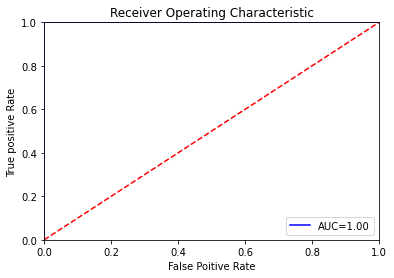

In [70]:
#AUC ROC curve
from sklearn import metrics
probs=g.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Poitive Rate')
plt.show()

# splitting the data to Test

In [71]:
x=df_new.drop(['Loan_Status'],axis=1)
y=df_new['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=699)

In [72]:
#predict the values
g=GradientBoostingClassifier()
g.fit(x_train,y_train)
pred=g.predict(x_test)
print("Predicted ",pred)
print("actual",y_test)

Predicted  [1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 0 1 1 1]
actual 511    1
288    1
469    0
597    0
418    1
      ..
431    0
69     0
279    1
5      1
324    1
Name: Loan_Status, Length: 116, dtype: int32


In [73]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

,Actual,Predicted
511,1,1
288,1,1
469,0,1
597,0,0
418,1,1
...,...,...
431,0,0
69,0,0
279,1,1
5,1,1


### Conclusion: we are getting GradientBoostingClassifier model accuracy score as 100% and cross_val_score as 76.7, so,we accept this model

# Saving the model 

In [74]:
import pickle
file_name='Loan_prediction.pkl'
pickle.dump(g,open(file_name,'wb'))